# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [1]:
import pandas as pd

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [2]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx")
pd.options.display.max_colwidth = 30000
df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [12]:
rows, columns = df.shape
print(f"rows: {rows}")
# There are more than 30,000 rows. 

rows: 81937


## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

#### This dataset includes information about different dogs, their owners, and licenses.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81937 entries, 0 to 81936
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Owner Zip Code          81937 non-null  int64         
 1   Animal Name             81738 non-null  object        
 2   Animal Gender           81937 non-null  object        
 3   Primary Breed           81937 non-null  object        
 4   Secondary Breed         10547 non-null  object        
 5   Animal Dominant Color   81608 non-null  object        
 6   Animal Secondary Color  56919 non-null  object        
 7   Animal Third Color      17641 non-null  object        
 8   Animal Birth            81937 non-null  datetime64[ns]
 9   Spayed or Neut          81937 non-null  object        
 10  Guard or Trained        49576 non-null  object        
 11  Vaccinated              81937 non-null  object        
 12  Application Date        81937 non-null  dateti

#### Each row is a dog with license. `Animal Name` is each dog's name. `Owner zip code` is the zip code address for the owner of each dog in the according row.

# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

1. Are there more female or male dogs getting training? And, how many trained female and male dogs are there?
2. What is the average duration of license validity?
3. Does the dogs usually get the license after their birth, or is there a time gap?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

<Axes: xlabel='Primary Breed'>

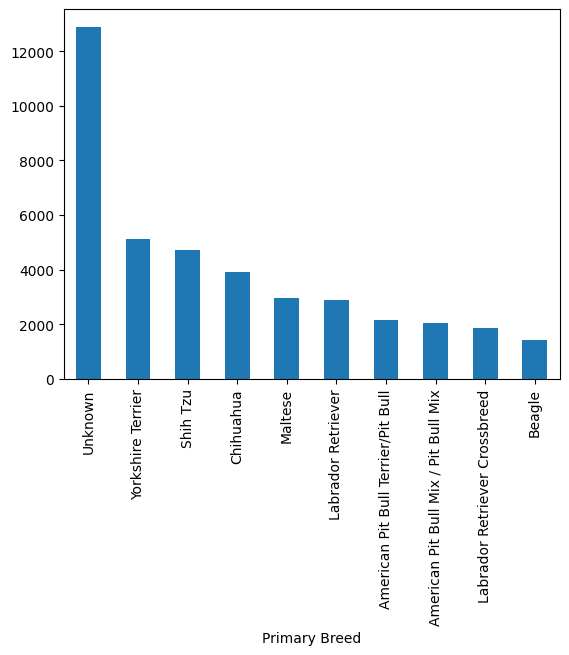

In [19]:
df['Primary Breed'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar', x='Primary Breed')

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

<Axes: xlabel='Primary Breed'>

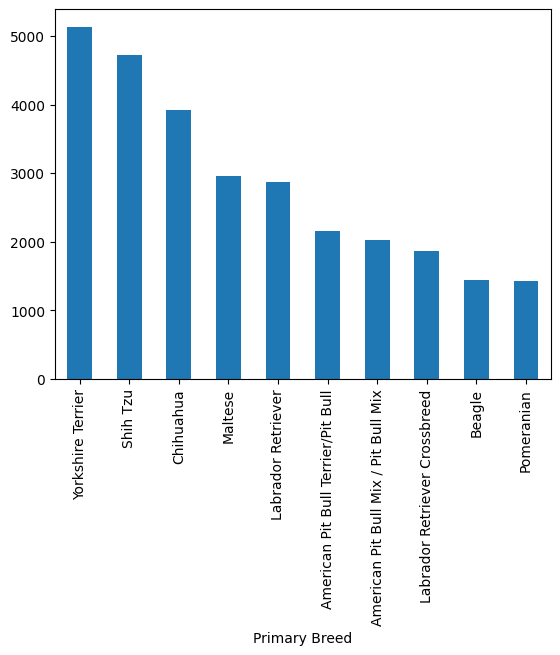

In [30]:
df[df['Primary Breed'] != 'Unknown']['Primary Breed'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar', x='Primary Breed')

## What are the most popular dog names?

In [32]:
# list the top five dog names
df['Animal Name'].value_counts().head()

Animal Name
UNKNOWN    742
Bella      527
Max        515
Charlie    403
Lola       387
Name: count, dtype: int64

In [40]:
# list top five dog names that are not "unknown"
df[(df['Animal Name'] != 'UNKNOWN') & (df['Animal Name'] != 'Unknown')]['Animal Name'].value_counts().head()

Animal Name
Bella      527
Max        515
Charlie    403
Lola       387
Rocky      354
Name: count, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [25]:
df[df['Animal Name']=='Max'].value_counts().sum()

np.int64(11)

In [26]:
df[df['Animal Name']=='Maxwell'].value_counts().sum()

np.int64(3)

In [27]:
# check if any of them have my name
df[df['Animal Name']=='Kristen'].value_counts().sum()
# no dog has my name! 

np.int64(0)

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [43]:
# not include the null values while calculating the percentage
df[df['Guard or Trained'] == 'Yes']['Guard or Trained'].value_counts(dropna = True, ascending=False, normalize=True)

Guard or Trained
Yes    1.0
Name: proportion, dtype: float64

## What are the actual numbers?

In [44]:
df[df['Guard or Trained'] == 'Yes']['Guard or Trained'].value_counts(dropna = True, ascending=False, normalize=False)

Guard or Trained
Yes    51
Name: count, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [57]:
df[df['Guard or Trained'].isin(['Yes', 'No'])]['Guard or Trained'].value_counts().sum()

np.int64(49576)

#### The sum of dogs that are labelled as guard or not guard dogs are not equal to the number of rows. Because there are null values (labelled as "NaN") in this column.

In [58]:
# for example. row 3 is labelled as "NaN"
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## Fill in all of those empty "Guard or Trained" columns with "No"

**We're maing a big assumption** here that if they aren't listed as guard dogs, they probably aren't guard dogs.

Look up `.fillna`. Check your result with another `.value_counts()`

In [63]:
# fill in empty values with "No"
df['Guard or Trained'] = df['Guard or Trained'].fillna('No')

In [61]:
# check if guard and non-guard dogs in total after this change equals the number of all rows
df[df['Guard or Trained'].isin(['Yes', 'No'])]['Guard or Trained'].value_counts().sum()

np.int64(81937)

In [65]:
# get the number of all rows
df.shape
# yes, they are the same!

(81937, 15)

## What are the top dog breeds for guard dogs? 

In [71]:
# I exclude all the breeds as "Unknown" and select the top 5 primary breeds.
df[(df['Guard or Trained'] == 'Yes') & (df['Primary Breed'] != 'Unknown')]['Primary Breed'].value_counts().sort_values(ascending=False).head()

Primary Breed
German Shepherd Dog                     4
Labrador Retriever                      3
Rottweiler                              3
American Pit Bull Mix / Pit Bull Mix    3
Chihuahua                               3
Name: count, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with `df['Animal Birth'].dt.year` or `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [72]:
df['Year'] = df['Animal Birth'].dt.year
# check to confirm if the column is created
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [76]:
# Here, I calcuate the dog's age at the date when the license is issued
df['Age'] = df['License Issued Date'].dt.year - df['Year']
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,8
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,1
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,0
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,6
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,0


In [80]:
# average age
# first, I confirm if there are any null values in the colummn "Age'.
df['Age'].isna().value_counts()
# since the numbers of false values equal to the total row numbers, there is no null value.

Age
False    81937
Name: count, dtype: int64

In [81]:
# average age
df['Age'].mean()

np.float64(5.627408862906868)

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

In [3]:
zipcodes_df = pd.read_csv("zipcodes-neighborhoods.csv")
# check how to join and what the same column is 
zipcodes_df.head()

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx


In [4]:
merged = zipcodes_df.merge(df, left_on='zip', right_on='Owner Zip Code')
# check if I joined them together
merged.head()

,neighborhood,zip,borough,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,Central Bronx,10453,Bronx,10453,T-Bone,M,Bulldog,NaN,White,Tan,Apricot,2010-04-01,Yes,NaN,Yes,2014-11-16 16:48:08.080,2014-11-16,2016-11-16
1,Central Bronx,10453,Bronx,10453,Cici,F,American Pit Bull Mix / Pit Bull Mix,NaN,BROWN,RUST,BLACK,2008-11-01,Yes,No,No,2015-02-06 10:35:12.917,2015-02-06,2017-04-28
2,Central Bronx,10453,Bronx,10453,Blue,M,Basset Hound,NaN,Brown,Tan,Cream,2005-02-01,Yes,NaN,No,2015-02-10 16:43:24.847,2015-02-10,2017-02-10
3,Central Bronx,10453,Bronx,10453,Boi,M,Yorkshire Terrier,NaN,Black,Gray,Tan,2011-02-01,Yes,NaN,Yes,2015-02-10 16:43:24.847,2015-02-10,2017-02-10
4,Central Bronx,10453,Bronx,10453,MARSHMELLO,F,Samoyed,NaN,WHITE,NaN,NaN,2004-01-01,Yes,No,Yes,2015-03-27 14:47:53.483,2015-03-27,2017-03-30


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [106]:
# Bronx
# exclude the names unknown
merged[(merged['borough']=='Bronx') & (merged['Animal Name']!='Unknown') & (merged['Animal Name']!='UNKNOWN') & (merged['Animal Name']!='unknown')]['Animal Name'].value_counts().sort_values(ascending=False).head(1)

Animal Name
Rocky    60
Name: count, dtype: int64

In [107]:
# Brooklyn
# exclude the names unknown
merged[(merged['borough']=='Brooklyn') & (merged['Animal Name']!='Unknown') & (merged['Animal Name']!='UNKNOWN') & (merged['Animal Name']!='unknown')]['Animal Name'].value_counts().sort_values(ascending=False).head(1)

Animal Name
Max    113
Name: count, dtype: int64

In [118]:
# The Upper East Side
# exclude the names unknown
merged[(merged['neighborhood']=='Upper East Side') & (merged['Animal Name']!='Unknown') & (merged['Animal Name']!='UNKNOWN') & (merged['Animal Name']!='unknown')]['Animal Name'].value_counts().sort_values(ascending=False).head(1)

Animal Name
Lucy    40
Name: count, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

#### Though there are two columns related to breed, "primary" and "secondary" breed, 
#### there are only a few dogs including the secondary breed
#### Also, those names of secondary breeds are not common and cannot be found in the coluln of primary breed.
#### Thus, I decided to use "primary breed" column to find the most common dog breed.

In [64]:
# exlcude unknown 
# a list of unknown entries
unknown = ['Unknown', 'UNKNOWN', 'unknown']
filtered = merged[~merged['Primary Breed'].isin(unknown)]
# I tried to use for loop, but I thought that is too complicated, so I searched on pandas documentation, and found this one
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html
filtered.groupby('neighborhood')['Primary Breed'].apply(lambda x: x.value_counts().idxmax())

neighborhood
Borough Park                                      Yorkshire Terrier
Bronx Park and Fordham                            Yorkshire Terrier
Bushwick and Williamsburg                         Yorkshire Terrier
Canarsie and Flatlands                            Yorkshire Terrier
Central Bronx                                     Yorkshire Terrier
Central Brooklyn                                  Yorkshire Terrier
Central Harlem                                    Yorkshire Terrier
Central Queens                                    Yorkshire Terrier
Chelsea and Clinton                                       Chihuahua
East Harlem                                       Yorkshire Terrier
East New York and New Lots       American Pit Bull Terrier/Pit Bull
Flatbush                                          Yorkshire Terrier
Gramercy Park and Murray Hill                     Yorkshire Terrier
Greenpoint                                                Chihuahua
Greenwich Village and Soho         

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

Be conscious of case-sensitivity! `WHITE` and `white` aren't the same, so you might need to standardize first.

Using `.isin` is going to be very helpful.

In [26]:
# check what are the names of colors
# merged['Animal Dominant Color'].unique()

array(['White', 'BROWN', 'Brown', 'Black', 'WHITE', 'BLOND', 'Fawn',
       'Tan', 'Brindle', 'Gold', 'BLACK', 'Cream', 'TAN', 'Apricot',
       'Blue', 'Red', 'GRAY', 'Charcoal', 'BRINDLE', 'Chocolate', 'Blond',
       'BLUE', 'Gray', 'FAWN', 'RED', 'RUST', 'Rust', 'CHOCOLATE', nan,
       'GOLD', 'APRICOT', 'Silver', 'CREAM', 'CHARCOAL', 'ORANGE',
       'Blue Merle', 'SILVER', 'Orange', 'Red Sesame', 'Sable',
       'BLUE MERLE'], dtype=object)

In [37]:
color_set = ['white', 'black', 'grey', 'WHITE', 'BLACK', 'GREY', 'White', 'Black', 'Grey']

# I think acccording to the definition of "monochrome", connecting to something is single,
# I think monochrome animal should just have one color. 
# (For example, a dog with white as its primary color but black as secondary is not monochrome.)

merged['monochrome'] = (
    (merged['Animal Dominant Color'].isin(color_set)) &
    (merged['Animal Secondary Color'].isna()) &
    (merged['Animal Third Color'].isna())
)
merged.head()

,neighborhood,zip,borough,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,monochrome
0,Central Bronx,10453,Bronx,10453,T-Bone,M,Bulldog,NaN,White,Tan,Apricot,2010-04-01,Yes,NaN,Yes,2014-11-16 16:48:08.080,2014-11-16,2016-11-16,False
1,Central Bronx,10453,Bronx,10453,Cici,F,American Pit Bull Mix / Pit Bull Mix,NaN,BROWN,RUST,BLACK,2008-11-01,Yes,No,No,2015-02-06 10:35:12.917,2015-02-06,2017-04-28,False
2,Central Bronx,10453,Bronx,10453,Blue,M,Basset Hound,NaN,Brown,Tan,Cream,2005-02-01,Yes,NaN,No,2015-02-10 16:43:24.847,2015-02-10,2017-02-10,False
3,Central Bronx,10453,Bronx,10453,Boi,M,Yorkshire Terrier,NaN,Black,Gray,Tan,2011-02-01,Yes,NaN,Yes,2015-02-10 16:43:24.847,2015-02-10,2017-02-10,False
4,Central Bronx,10453,Bronx,10453,MARSHMELLO,F,Samoyed,NaN,WHITE,NaN,NaN,2004-01-01,Yes,No,Yes,2015-03-27 14:47:53.483,2015-03-27,2017-03-30,True


In [42]:
merged['monochrome'].value_counts()
# 'True' values are monochromes (10,582 in total)

monochrome
False    70277
True     10582
Name: count, dtype: int64

## How many dogs are in each borough? Plot it in a graph.

<Axes: xlabel='borough', ylabel='numbers of dogs'>

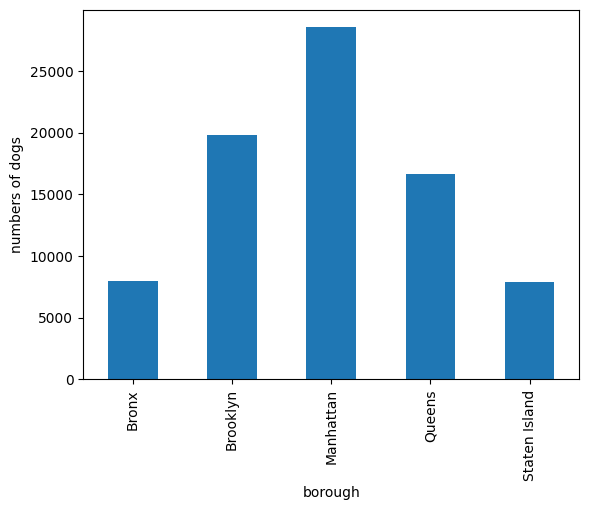

In [23]:
merged.groupby('borough').size().plot(kind='bar',ylabel='numbers of dogs')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [45]:
population_df = pd.read_csv("boro_population.csv")
# check how to join and what the same column is 
population_df.head()

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [50]:
merged2 = population_df.merge(merged, left_on = 'borough', right_on='borough')
# check the columns
merged2.head()

,borough,population,area_sqmi,neighborhood,zip,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,...,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,monochrome
0,Manhattan,1644518,23,Central Harlem,10026,10026,OREO MARIN,F,Havanese,NaN,...,WHITE,NaN,2005-09-01,Yes,No,Yes,2014-09-24 11:00:58.667,2014-09-24,2017-05-21,False
1,Manhattan,1644518,23,Central Harlem,10026,10026,Jake Isbell,M,Puggle,NaN,...,NaN,NaN,2013-10-01,Yes,NaN,Yes,2014-10-01 22:16:25.653,2014-10-01,2017-10-01,False
2,Manhattan,1644518,23,Central Harlem,10026,10026,OLIVIA,F,Havanese,NaN,...,TAN,BLACK,2008-03-01,Yes,No,Yes,2014-10-11 15:08:12.983,2014-10-11,2017-08-19,False
3,Manhattan,1644518,23,Central Harlem,10026,10026,Henry,M,Unknown,Hound Mix,...,White,Brown,2007-07-01,Yes,NaN,Yes,2014-11-01 13:52:57.347,2014-11-01,2016-11-01,False
4,Manhattan,1644518,23,Central Harlem,10026,10026,Milo,M,Yorkshire Terrier,NaN,...,Tan,Brown,2011-06-01,Yes,NaN,Yes,2014-11-04 21:11:14.157,2014-11-04,2016-11-04,False


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.

In [84]:
# exlcude unknown 
# a list of unknown entries
unknown = ['Unknown', 'UNKNOWN', 'unknown']
filtered = merged2[~merged2['Primary Breed'].isin(unknown)]
# find top 5 breeds in each borough
top_5breeds = filtered.groupby('borough')['Primary Breed'].value_counts().groupby('borough').head(5).reset_index(name='count')
top_5breeds

,borough,Primary Breed,count
0,Bronx,Yorkshire Terrier,753
1,Bronx,Shih Tzu,682
2,Bronx,Chihuahua,553
3,Bronx,American Pit Bull Terrier/Pit Bull,442
4,Bronx,Maltese,345
5,Brooklyn,Yorkshire Terrier,1316
6,Brooklyn,Shih Tzu,1236
7,Brooklyn,Chihuahua,987
8,Brooklyn,Labrador Retriever,655
9,Brooklyn,Maltese,640


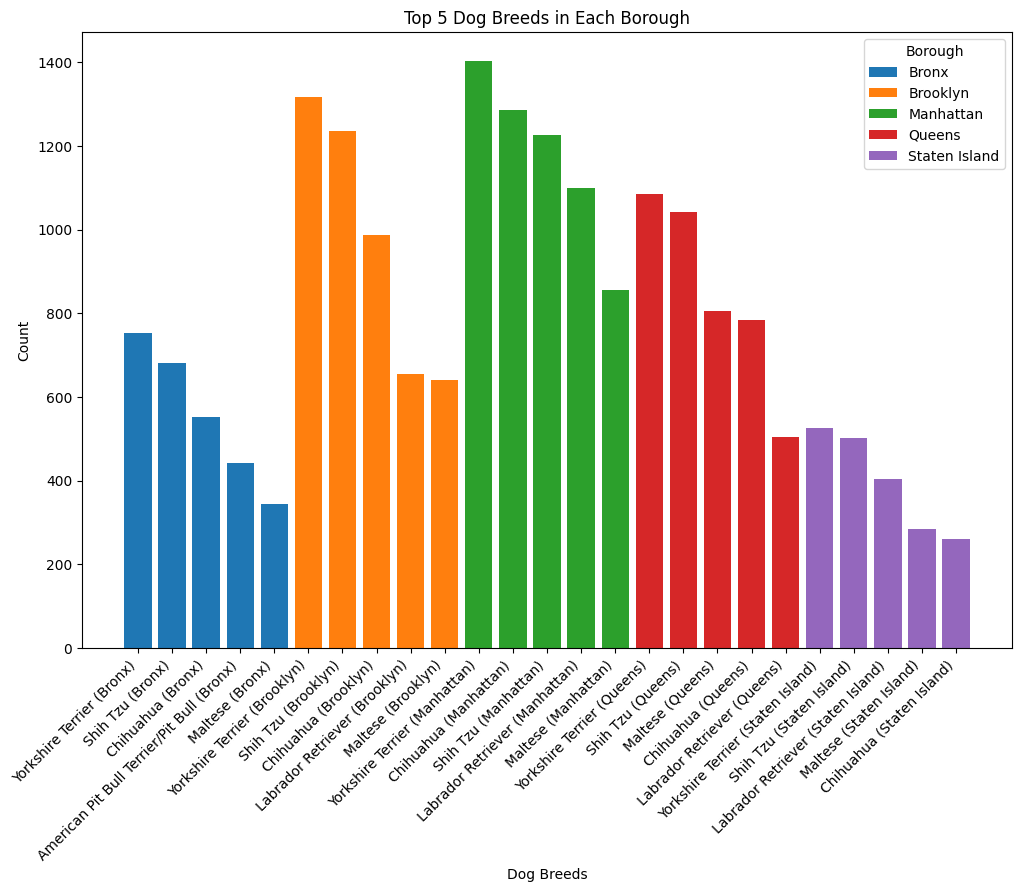

In [88]:
# both stack overflow and chatGPT advised me to use matplotlib for a better visual display
import matplotlib.pyplot as plt

# Plot the chart
plt.figure(figsize=(12, 8))
for borough in top_5breeds['borough'].unique():
    borough_data = top_5breeds[top_5breeds['borough'] == borough]
    plt.bar(
        borough_data['Primary Breed'] + f" ({borough})",
        borough_data['count'],
        label=borough
    )

plt.title("Top 5 Dog Breeds in Each Borough")
plt.xlabel("Dog Breeds")
plt.ylabel("Count")
# asked chatGPT how to make my chart less crowded 
plt.xticks(rotation=45, ha='right')
plt.legend(title="Borough")
plt.show()